<a href="https://colab.research.google.com/github/harmonicm/C-project1/blob/main/c1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/harmonicm/C-project1.git
!mv C-project1/* ./

Cloning into 'C-project1'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 66 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (66/66), done.


1. '%matplotlib inline' sets the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
2. 




In [ ]:
from __future__ import print_function 
#__future__ module includes all the latest functions which were not present in the previous version in Python.
%matplotlib inline 
import matplotlib as plt

import os
import numpy as np
from models import *

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
import torch.optim

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark =True
dtype = torch.cuda.FloatTensor

! pip install scikit-image
from skimage.metrics import peak_signal_noise_ratio
from denoising_utility import *

In [ ]:
imsize =-1
PLOT = True
sigma = 50
sigma_ = sigma/255.

In [ ]:
img_path = '/content/data/original.png'

Original Image: 


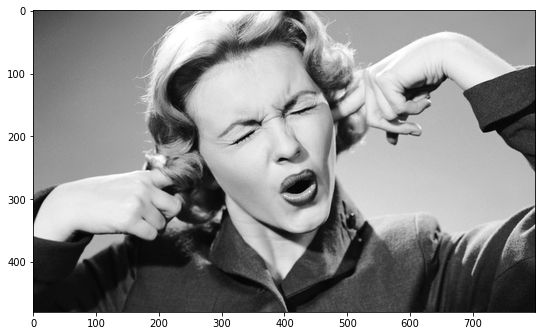


Noised Image: 


In [ ]:
img_pil = crop_image(get_image(img_path, imsize)[0], d=16)
img_np = pil_to_np(img_pil) # converting PIL image to np array
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma_) #adding noise to the original image
if PLOT:
  print('Original Image: ')
  plot_image_grid([img_np], 1, 8);
  print('\nNoised Image: ')
  plot_image_grid([img_noisy_np], 1, 8);

Set up parameters and net


In [ ]:
INPUT = 'noise' # 'meshgrid'
pad = 'reflection'
OPT_OVER = 'net' # 'net,input'
reg_noise_std = 1./20. # set to 1./20. for sigma=50
LR = 0.01

OPTIMIZER='adam' # 'LBFGS'
show_every = 100
exp_weight=0.99

num_iter = 2500
input_depth = 1
figsize = 8

# creates a convolutional network with skip connections
net = get_net(input_depth, 'skip', pad, n_channels=1,
              skip_n33d=128, skip_n33u=128, skip_n11=4, 
              num_scales=5, upsample_mode='bilinear').type(dtype)


# get initial noised image (random) from which the network will try and build up output image
# denoted as z in the paper
net_input = get_noise(input_depth, INPUT, (img_pil.size[1], img_pil.size[0])).type(dtype).detach()

# Compute number of parameters
s  = sum([np.prod(list(p.size())) for p in net.parameters()]); 

print ('Number of params: %d' % s)

# Loss
mse = torch.nn.MSELoss().type(dtype)

img_noisy_torch = np_to_torch(img_noisy_np).type(dtype) # converting np array to torch tensor

Number of params: 2181737


Starting optimization with ADAM


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)




After 0 iterations: 
Iteration 00000    Loss 0.102072   PSNR_noisy: 9.910946   PSRN_gt: 10.745449   PSNR_gt_sm: 10.745449 




After 100 iterations: 
Iteration 00100    Loss 0.056091   PSNR_noisy: 12.511100   PSRN_gt: 15.016817   PSNR_gt_sm: 13.509520 


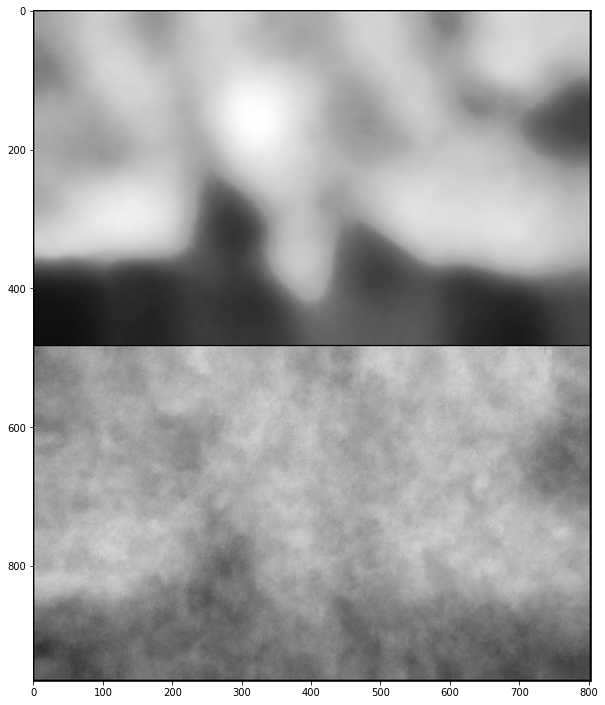



After 200 iterations: 
Iteration 00200    Loss 0.047250   PSNR_noisy: 13.255963   PSRN_gt: 16.765518   PSNR_gt_sm: 15.816568 


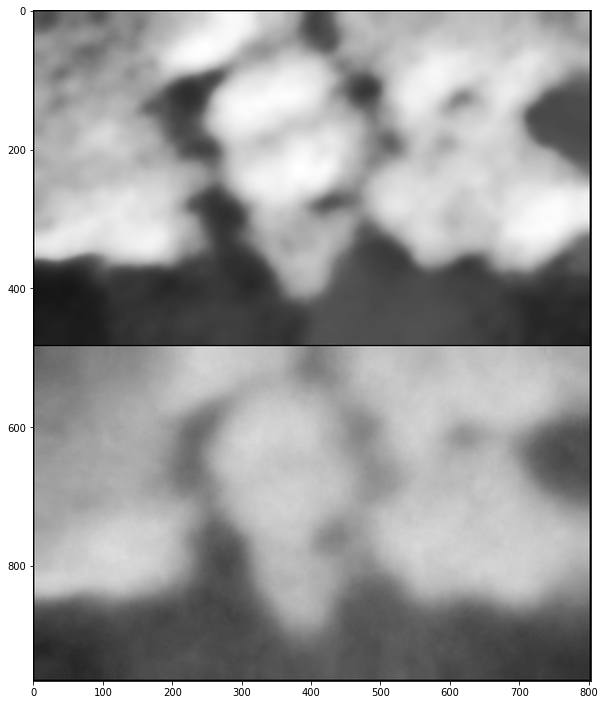



After 300 iterations: 
Iteration 00300    Loss 0.042198   PSNR_noisy: 13.747087   PSRN_gt: 18.234267   PSNR_gt_sm: 17.751601 




After 400 iterations: 
Iteration 00400    Loss 0.038898   PSNR_noisy: 14.100698   PSRN_gt: 19.341131   PSNR_gt_sm: 19.206245 


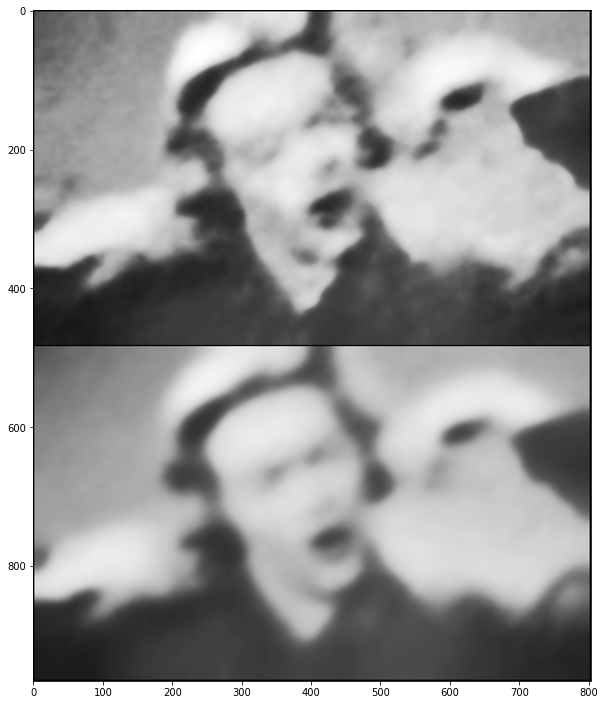



After 500 iterations: 
Iteration 00500    Loss 0.037467   PSNR_noisy: 14.263463   PSRN_gt: 19.980555   PSNR_gt_sm: 20.394108 


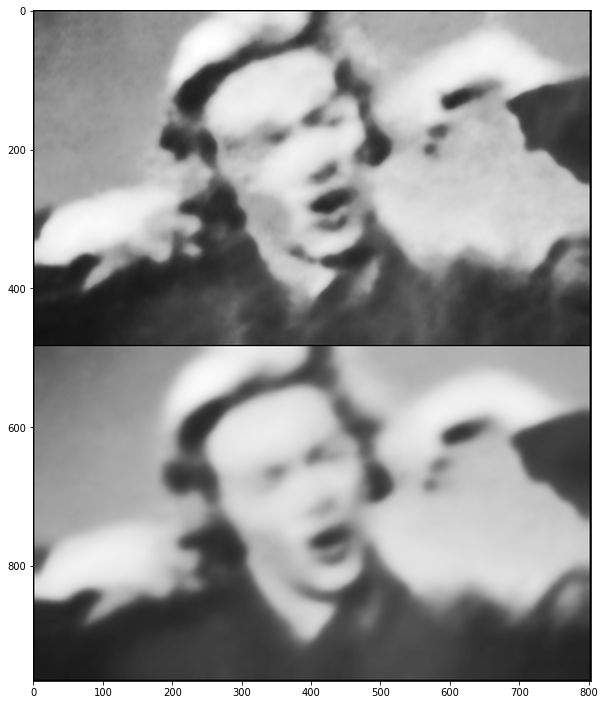



After 600 iterations: 
Iteration 00600    Loss 0.035405   PSNR_noisy: 14.509308   PSRN_gt: 21.258818   PSNR_gt_sm: 21.361941 


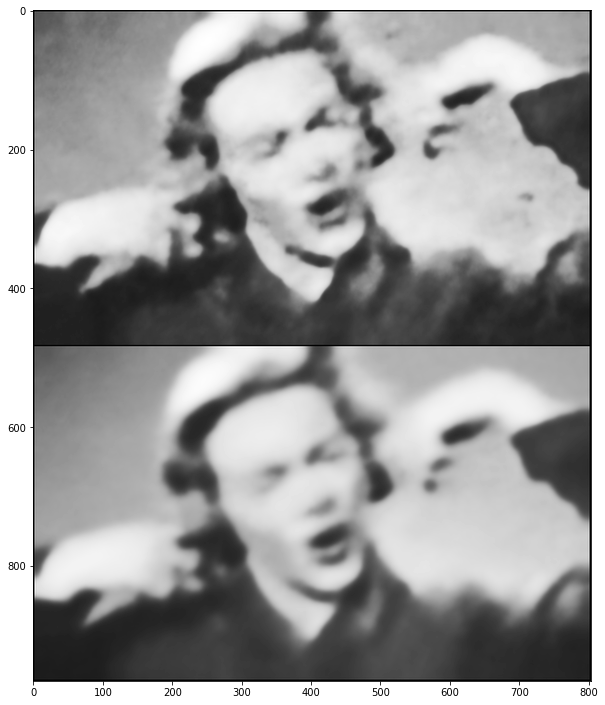



After 700 iterations: 
Iteration 00700    Loss 0.034428   PSNR_noisy: 14.630928   PSRN_gt: 21.881274   PSNR_gt_sm: 22.177676 




After 800 iterations: 
Iteration 00800    Loss 0.033895   PSNR_noisy: 14.698590   PSRN_gt: 22.502474   PSNR_gt_sm: 22.879811 


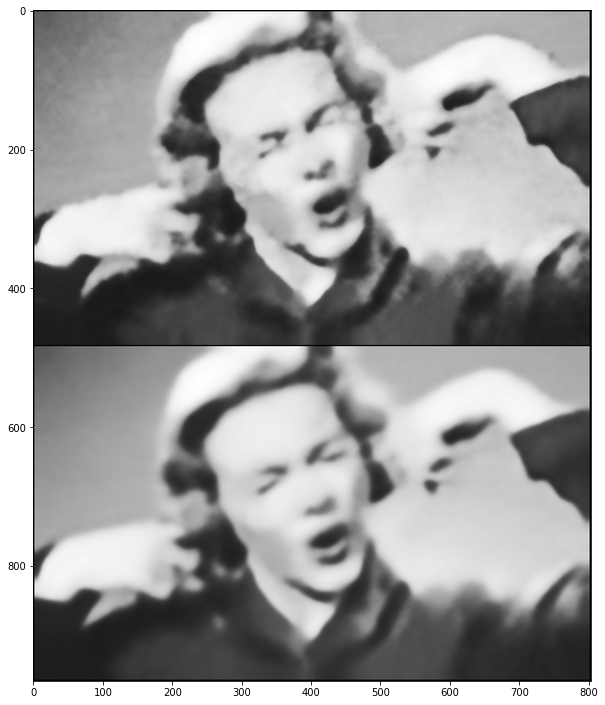



After 900 iterations: 
Iteration 00900    Loss 0.033166   PSNR_noisy: 14.793062   PSRN_gt: 23.094361   PSNR_gt_sm: 23.535722 


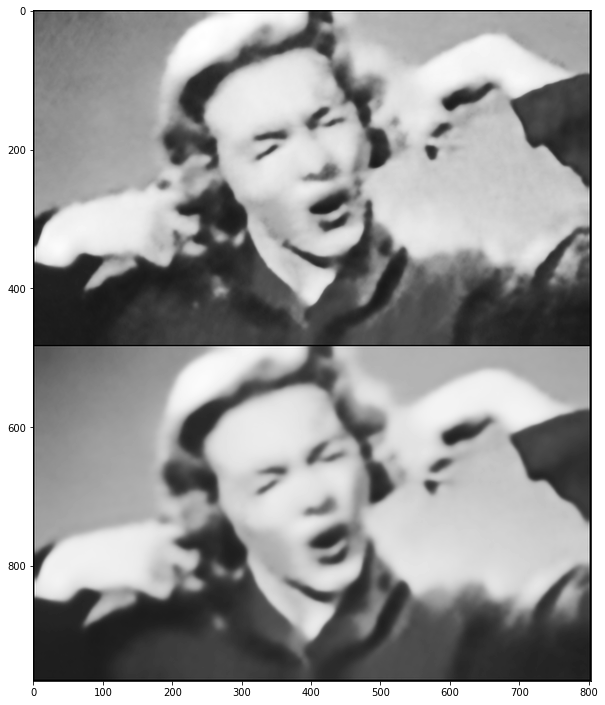



After 1000 iterations: 
Iteration 01000    Loss 0.032738   PSNR_noisy: 14.849528   PSRN_gt: 23.465983   PSNR_gt_sm: 24.123549 




After 1100 iterations: 
Iteration 01100    Loss 0.032203   PSNR_noisy: 14.920974   PSRN_gt: 24.167113   PSNR_gt_sm: 24.711791 




After 1200 iterations: 
Iteration 01200    Loss 0.032033   PSNR_noisy: 14.944050   PSRN_gt: 24.469793   PSNR_gt_sm: 25.221513 




After 1300 iterations: 
Iteration 01300    Loss 0.031518   PSNR_noisy: 15.014479   PSRN_gt: 25.249730   PSNR_gt_sm: 25.691272 




After 1400 iterations: 
Iteration 01400    Loss 0.031238   PSNR_noisy: 15.053235   PSRN_gt: 25.552546   PSNR_gt_sm: 26.106314 




After 1500 iterations: 
Iteration 01500    Loss 0.031207   PSNR_noisy: 15.057435   PSRN_gt: 25.557423   PSNR_gt_sm: 26.458596 




After 1600 iterations: 
Iteration 01600    Loss 0.030955   PSNR_noisy: 15.092761   PSRN_gt: 25.855503   PSNR_gt_sm: 26.802529 




After 1700 iterations: 
Iteration 01700    Loss 0.030772   PSNR_noisy: 15.118473   PSRN_gt: 26.091971   PSNR_gt_sm: 27.092685 


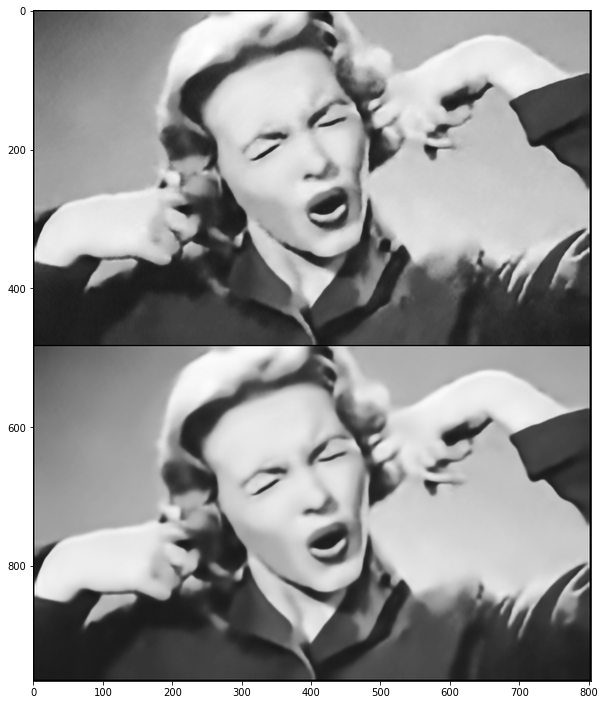



After 1800 iterations: 
Iteration 01800    Loss 0.030552   PSNR_noisy: 15.149599   PSRN_gt: 26.568854   PSNR_gt_sm: 27.339659 




After 1900 iterations: 
Iteration 01900    Loss 0.030378   PSNR_noisy: 15.174398   PSRN_gt: 27.035454   PSNR_gt_sm: 27.582134 




After 2000 iterations: 
Iteration 02000    Loss 0.030335   PSNR_noisy: 15.180629   PSRN_gt: 26.663891   PSNR_gt_sm: 27.755206 




After 2100 iterations: 
Iteration 02100    Loss 0.030166   PSNR_noisy: 15.204759   PSRN_gt: 27.096226   PSNR_gt_sm: 27.886628 




After 2200 iterations: 
Iteration 02200    Loss 0.030193   PSNR_noisy: 15.200868   PSRN_gt: 26.658468   PSNR_gt_sm: 27.991720 




After 2300 iterations: 
Iteration 02300    Loss 0.030007   PSNR_noisy: 15.227735   PSRN_gt: 27.181998   PSNR_gt_sm: 28.066521 


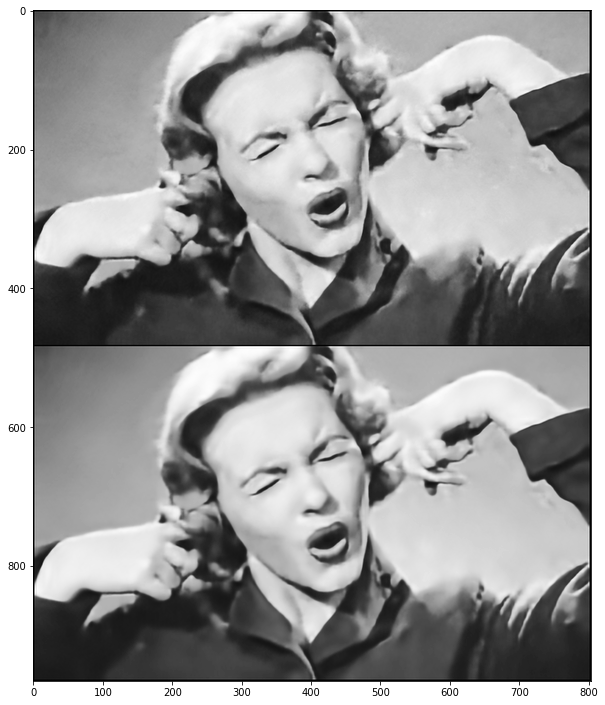



After 2400 iterations: 
Iteration 02400    Loss 0.029924   PSNR_noisy: 15.239779   PSRN_gt: 27.124655   PSNR_gt_sm: 28.108022 


In [ ]:
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
out_avg = None
last_net = None
psrn_noisy_last = 0
loss = []

i = 0
def closure():
    
    global i, out_avg, psrn_noisy_last, last_net, net_input, loss
    
    if reg_noise_std > 0:
        net_input = net_input_saved + (noise.normal_() * reg_noise_std) #changing the input to the netwok
    
    out = net(net_input)
    
    # Smoothing
    if out_avg is None:
        out_avg = out.detach()
    else:
        out_avg = out_avg * exp_weight + out.detach() * (1 - exp_weight) # calculating average network output
            
    total_loss = mse(out, img_noisy_torch)
    total_loss.backward()

    loss.append(total_loss.item())
        
    
    # caculating psrn
    psrn_noisy = peak_signal_noise_ratio(img_noisy_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the actual noisy image 
    psrn_gt    = peak_signal_noise_ratio(img_np, out.detach().cpu().numpy()[0]) # comparing psnr for the output image and the original image 
    psrn_gt_sm = peak_signal_noise_ratio(img_np, out_avg.detach().cpu().numpy()[0]) # comparing psnr for the output average and the original image 
    
    if  PLOT and i % show_every == 0:
        out_np = torch_to_np(out)
        # plotting the output image along the average image calculated
        print(f'\n\nAfter {i} iterations: ')
        print ('Iteration %05d    Loss %f   PSNR_noisy: %f   PSRN_gt: %f   PSNR_gt_sm: %f' % (i, total_loss.item(), psrn_noisy, psrn_gt, psrn_gt_sm), '\r', end='\n')
        plot_image_grid([np.clip(out_np, 0, 1), 
                         np.clip(torch_to_np(out_avg), 0, 1)], factor=figsize, nrow=1)
        
        
    
    # Backtracking
    if i % show_every:
        if psrn_noisy - psrn_noisy_last < -5: 
            print('Falling back to previous checkpoint.')

            for new_param, net_param in zip(last_net, net.parameters()):
                net_param.data.copy_(new_param.cuda())

            return total_loss*0
        else:
            last_net = [x.detach().cpu() for x in net.parameters()]
            psrn_noisy_last = psrn_noisy
            
    i += 1

    return total_loss

p = get_params(OPT_OVER, net, net_input)
optimize(OPTIMIZER, p, closure, LR, num_iter)

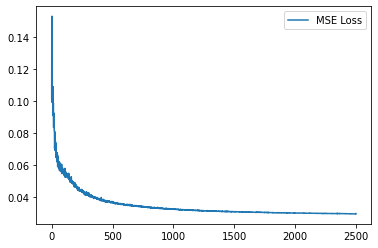

In [ ]:
# Plotting the loss as a function of number of iterations
itr = [i for i in range(num_iter)]
plt.plot(itr, loss, )
plt.legend(['MSE Loss'])
plt.show()

We don't want the network to overfit the noised image and the mse loss to be so small that's we stop pretty early.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Output Image from the network: 


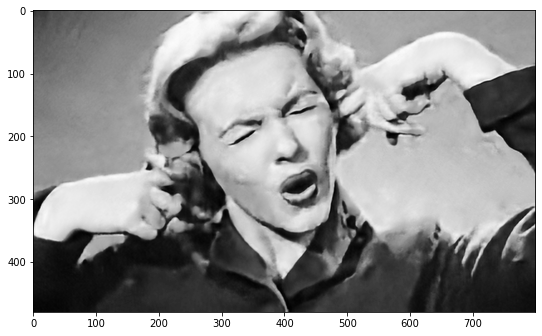


Noised Image: 



Original Image: 


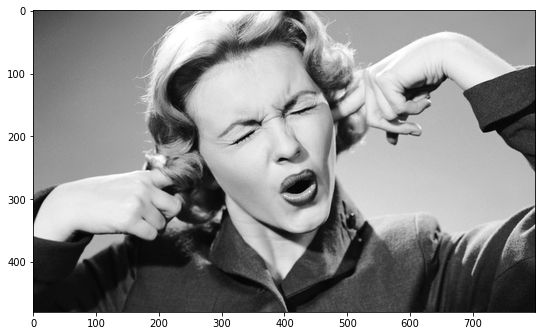

In [ ]:
out_np = torch_to_np(net(net_input))

print('Output Image from the network: ')
plot_image_grid([np.clip(out_np, 0, 1)], factor=8);

print('\nNoised Image: ')
plot_image_grid([img_noisy_np], factor=8);

print('\nOriginal Image: ')
plot_image_grid([img_np], factor=8);

In [ ]:
img_np.shape

(1, 480, 800)

In [ ]:
type(img_np.shape)

tuple